![title](../images/header.png)

Merging CEO data phase II (2015-2022)
-------
This notebook merges validated data from different CEO CAFI projects for 2015-2022
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [2]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CMR'

### 1. Read all CEO sample files from eSBAE
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [3]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-whisp-1522-coll1-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-whisp-1522-coll2-sample-data.csv')
#ceo6 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-whisp-1522-coll3-sample-data.csv')
#GAB
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-GAB-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-GAB-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-GAB-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-GAB-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-GAB-eSBAE-validation-5-sample-data.csv')
#EQG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-EQG-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-EQG-eSBAE-validation-2-sample-data.csv')

#COG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-CAFI-DDD-ROC-eSBAE-validation-1-sample-data.csv')
#CMR
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-CMR-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-CMR-eSBAE-validation-2-sample-data.csv')
#CAR
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-2-sample-data.csv')

make a list of the ceo files for processing

In [4]:
#depends on how many files you have
# if you have 5 files
#ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5,ceo6]
# if you have 3 files
#ceo_files = [ceo1, ceo2, ceo3]
# if you have 2 files
ceo_files = [ceo1,ceo2]
# if you have 1 file
#ceo_files = [ceo1]

In [5]:
# output file  CEO validated data file with select columns
ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_1522_clean.csv'

In [6]:
ceo1['collection'] = 'coll_1522_1'
ceo2['collection'] = 'coll_1522_2'
#ceo3['collection'] = 'coll_1522_3'
#ceo4['collection'] = 'whisp_1522_1'
#ceo5['collection'] = 'whisp_1522_2'
#ceo6['collection'] = 'whisp_1522_3'

### end of parameters

In [7]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'sample_internal_id', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17',

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [8]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='sample_geom', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")


# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'pl_point_id','sampleid', 'lon', 'lat', 
                    'sample_geom', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id':'point_id',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year_1522', 
    'Type de non-forêt en 2015':'Ref_NFtype_2015', 
    'Type de forêt en 2015':'Ref_Ftype_2015'
    #add other columns as needed
    #,'NOM': 'Province' # DRC province
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype_2015': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype_2015': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0','':'0'},
    'ArtFor':{'oui':'1','non':'0','':'0'},
    'IndFor':{'oui':'1','non':'0','':'0'},
    'ArtAg':{'oui':'1','non':'0','':'0'},
    'IndAg':{'oui':'1','non':'0','':'0'},
    'ArtMine':{'oui':'1','non':'0','':'0'},
    'IndMine':{'oui':'1','non':'0','':'0'},
    'Urb':{'oui':'1','non':'0','':'0'},
    'InfraR':{'oui':'1','non':'0','':'0'},
    'Other':{'oui':'1','non':'0','':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)

columns_to_fill = ['Ref_Change_1522','ArtAg','ArtFor','IndFor','IndAg','ArtMine','IndMine','Urb','InfraR','Other']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')

ceo 1 # of validated points: 498, # of not validated points: 0
ceo 2 # of validated points: 6235, # of not validated points: 0


remove non validated points and remove duplicates

In [9]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [10]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted']


In [11]:
merged_ceo_interpreted.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted
0,3195,3195,3195,11.966747,7.395009,POINT(11.966747 7.395009),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,4,coll_1522_1,1
1,10102,10102,10102,8.730171,4.992031,POINT(8.730171 4.992031),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,2,coll_1522_1,1
2,10505,10505,10505,8.810149,5.011035,POINT(8.810149 5.011035),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1
3,10885,10885,10885,8.643232,4.530968,POINT(8.643232 4.530968),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,7,coll_1522_1,1
4,11657,11657,11657,9.594402,6.486824,POINT(9.594402 6.486824),1,NaN,1,dégradation,1,0,0,1,0,0,NaN,0,0,0,2020.0,NaN,3,coll_1522_1,1


In [12]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='sample_geom', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [13]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    6733
Name: count, dtype: int64

In [14]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,6293
1,440


In [15]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    3662
0    3071
Name: count, dtype: int64

In [16]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NaN              6293
dégradation       257
déforestation     183
Name: count, dtype: int64

In [17]:
merged_ceo_nodup['collection'].value_counts(dropna=False)

collection
coll_1522_2    6235
coll_1522_1     498
Name: count, dtype: int64

##### create a LC type column

In [18]:
merged_ceo_nodup['Ref_LCover_2015'] = merged_ceo_nodup['Ref_Ftype_2015'].fillna(merged_ceo_nodup['Ref_NFtype_2015'])
merged_ceo_nodup['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
12    1906
3      923
9      856
1      789
11     623
15     438
13     295
16     227
4      222
17     148
2      111
8       74
10      42
14      41
7       22
18      16
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [19]:
# this might take some time
unique_check = merged_ceo_nodup['sample_geom'].nunique() == len(merged_ceo_nodup['sample_geom'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [20]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='sample_geom', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [21]:
#merged_ceo_nodup.head()

### 2. add new columns for change and year

clean up columns and replace values

In [22]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] =merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Ref_Change_Type_1522
Stable    3222
NF        3071
Deg        257
Def        183
Name: count, dtype: int64

In [23]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  #elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts(dropna=False)
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1522
Def2016      29
Def2017      29
Def2018      23
Def2019      26
Def2020      25
Def2021      21
Def2022      30
Deg2016      27
Deg2017      29
Deg2018      22
Deg2019      31
Deg2020      36
Deg2021      74
Deg2022      38
NF         3071
Stable     3222
Name: count, dtype: int64


In [24]:
# Step 1: Get value counts for 'Ref_LCover_2015'
value_counts_df = merged_ceo_nodup['Ref_LCover_2015'].value_counts().reset_index()
value_counts_df.columns = ['Ref_LCover_2015', 'Count']  # Rename columns

# Step 2: Calculate the total count and append as a row
total_count = value_counts_df['Count'].sum()
total_row = pd.DataFrame([['Total', total_count]], columns=value_counts_df.columns)

# Step 3: Append the total row to the DataFrame
value_counts_df = pd.concat([value_counts_df, total_row], ignore_index=True)

# Display the DataFrame with the total row
print(value_counts_df)

   Ref_LCover_2015  Count
0               12   1906
1                3    923
2                9    856
3                1    789
4               11    623
5               15    438
6               13    295
7               16    227
8                4    222
9               17    148
10               2    111
11               8     74
12              10     42
13              14     41
14               7     22
15              18     16
16           Total   6733


In [25]:
# Define the new column based on conditions
merged_ceo_nodup['Ref_Change_LCover_1522'] = merged_ceo_nodup.apply(lambda row: f"{row['Ref_Change_Type_1522']}_{row['Ref_LCover_2015']}", axis=1)

In [26]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_LCover_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_LCover_1522,,
Def_1,30,30
Def_10,2,2
Def_11,3,3
Def_2,8,8
Def_3,108,108
Def_4,13,13
Def_7,1,1
Def_8,3,3
Def_9,15,15


In [27]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_Year_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1522,,
Def2016,29,29
Def2017,29,29
Def2018,23,23
Def2019,26,26
Def2020,25,25
Def2021,21,21
Def2022,30,30
Deg2016,27,27
Deg2017,29,29


In [28]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_Type_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1522,,
Def,183,183
Deg,257,257
NF,3071,3071
Stable,3222,3222
Total,6733,6733


In [29]:
# Create a matrix showing the number of matching values between two columns
matrix = pd.crosstab(merged_ceo_nodup['Ref_LCover_2015'], merged_ceo_nodup['Ref_Change_Type_1522'], rownames=['Ref_LCover_2022'], colnames=['Ref_Change_Type_1522'])

# Display the matrix
print(matrix)

Ref_Change_Type_1522  Def  Deg    NF  Stable
Ref_LCover_2022                             
1                      30   52     0     707
10                      2    0     0      40
11                      3    9     0     611
12                      0    0  1906       0
13                      0    0   295       0
14                      0    0    41       0
15                      0    0   438       0
16                      0    0   227       0
17                      0    0   148       0
18                      0    0    16       0
2                       8    7     0      96
3                     108  149     0     666
4                      13   15     0     194
7                       1    0     0      21
8                       3    3     0      68
9                      15   22     0     819


In [30]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [31]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [32]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [33]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [34]:
merged_ceo_nodup['DensFor'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '1', 1, 0).astype(int)
merged_ceo_nodup['DensDryFor'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '2', 1, 0).astype(int)
merged_ceo_nodup['SecFor'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '3', 1, 0).astype(int)
merged_ceo_nodup['DryOpenFor'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '4', 1, 0).astype(int)
merged_ceo_nodup['Mangrove'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '7', 1, 0).astype(int)
merged_ceo_nodup['Swamp'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '8', 1, 0).astype(int)
merged_ceo_nodup['Gallery'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '9', 1, 0).astype(int)
merged_ceo_nodup['Plantation'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '10', 1, 0).astype(int)
merged_ceo_nodup['Woodland'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '11', 1, 0).astype(int)
merged_ceo_nodup['Shrubland'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '12', 1, 0).astype(int)
merged_ceo_nodup['Grassland'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '13', 1, 0).astype(int)
merged_ceo_nodup['Aquatic'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '14', 1, 0).astype(int)
merged_ceo_nodup['Bare'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '15', 1, 0).astype(int)
merged_ceo_nodup['Cultivated'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '16', 1, 0).astype(int)
merged_ceo_nodup['Builtup'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '17', 1, 0).astype(int)
merged_ceo_nodup['Water'] = np.where(merged_ceo_nodup['Ref_LCover_2015'] == '18', 1, 0).astype(int)

In [35]:
merged_ceo_nodup['DensFor_Def'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Def'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Def'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Def'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Def'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Def'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Def'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Def'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Def'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)

In [36]:
merged_ceo_nodup['DensFor_Deg'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Deg'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Deg'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Deg'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Deg'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Deg'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Deg'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Deg'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Deg'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)

In [37]:
merged_ceo_nodup['DensFor_Stable'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Stable'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Stable'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Stable'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Stable'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Stable'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Stable'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Stable'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Stable'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)

In [38]:
print(merged_ceo_nodup.dtypes)

plotid                      int64
point_id                    int64
sampleid                    int64
lon                       float64
lat                       float64
sample_geom                object
Ref_FNF_2015               object
Ref_Regeneration           object
Ref_Change_1522            object
Ref_Change_Type_1522       object
ArtFor                     object
ArtMine                    object
InfraR                     object
Urb                        object
IndFor                     object
Other                      object
Other_Desc                 object
IndMine                    object
IndAg                      object
ArtAg                      object
Ref_Year_1522             float64
Ref_NFtype_2015            object
Ref_Ftype_2015             object
collection                 object
interpreted                 int64
Ref_LCover_2015            object
Ref_Change_Year_1522       object
Ref_Change_LCover_1522     object
Def2016                     int64
Def2017       

In [39]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF','Stable',
'DensFor','DensDryFor','SecFor','DryOpenFor','Mangrove','Swamp','Gallery','Plantation','Woodland','Shrubland','Grassland','Aquatic','Bare','Cultivated','Builtup','Water',
'DensFor_Def','DensDryFor_Def','SecFor_Def','DryOpenFor_Def','Mangrove_Def','Swamp_Def','Gallery_Def','Plantation_Def','Woodland_Def',
'DensFor_Deg','DensDryFor_Deg','SecFor_Deg','DryOpenFor_Deg','Mangrove_Deg','Swamp_Deg','Gallery_Deg','Plantation_Deg','Woodland_Deg',
'DensFor_Stable','DensDryFor_Stable','SecFor_Stable','DryOpenFor_Stable','Mangrove_Stable','Swamp_Stable','Gallery_Stable','Plantation_Stable','Woodland_Stable']
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].fillna(0)

In [40]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Gallery_Def'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Gallery_Def,,
0,6718,6718
1,15,15
Total,6733,6733


In [41]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg', 'Swam

In [42]:
merged_ceo_nodup.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable
0,3195,3195,3195,11.966747,7.395009,POINT(11.966747 7.395009),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,4,coll_1522_1,1,4,Stable,Stable_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,382369,382369,382369,13.462191,4.616583,POINT(13.462191 4.616583),1,NaN,1,Deg,1,0,0,0,0,0,NaN,0,0,0,2022.0,NaN,1,coll_1522_1,1,1,Deg2022,Deg_1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,381976,381976,381976,13.326331,4.472166,POINT(13.326331 4.472166),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,381269,381269,381269,13.454098,4.943217,POINT(13.454098 4.943217),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,379902,379902,379902,13.021454,4.519678,POINT(13.021454 4.519678),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [43]:
print(merged_ceo_nodup.columns.values)

['plotid' 'point_id' 'sampleid' 'lon' 'lat' 'sample_geom' 'Ref_FNF_2015'
 'Ref_Regeneration' 'Ref_Change_1522' 'Ref_Change_Type_1522' 'ArtFor'
 'ArtMine' 'InfraR' 'Urb' 'IndFor' 'Other' 'Other_Desc' 'IndMine' 'IndAg'
 'ArtAg' 'Ref_Year_1522' 'Ref_NFtype_2015' 'Ref_Ftype_2015' 'collection'
 'interpreted' 'Ref_LCover_2015' 'Ref_Change_Year_1522'
 'Ref_Change_LCover_1522' 'Def2016' 'Def2017' 'Def2018' 'Def2019'
 'Def2020' 'Def2021' 'Def2022' 'Deg2016' 'Deg2017' 'Deg2018' 'Deg2019'
 'Deg2020' 'Deg2021' 'Deg2022' 'Defall' 'Degall' 'Stable' 'NF' 'DensFor'
 'DensDryFor' 'SecFor' 'DryOpenFor' 'Mangrove' 'Swamp' 'Gallery'
 'Plantation' 'Woodland' 'Shrubland' 'Grassland' 'Aquatic' 'Bare'
 'Cultivated' 'Builtup' 'Water' 'DensFor_Def' 'DensDryFor_Def'
 'SecFor_Def' 'DryOpenFor_Def' 'Mangrove_Def' 'Swamp_Def' 'Gallery_Def'
 'Plantation_Def' 'Woodland_Def' 'DensFor_Deg' 'DensDryFor_Deg'
 'SecFor_Deg' 'DryOpenFor_Deg' 'Mangrove_Deg' 'Swamp_Deg' 'Gallery_Deg'
 'Plantation_Deg' 'Woodland_Deg' 'DensFor_

In [44]:
merged_ceo_nodup['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
Stable     3222
NF         3071
Deg2021      74
Deg2022      38
Deg2020      36
Deg2019      31
Def2022      30
Deg2017      29
Def2017      29
Def2016      29
Deg2016      27
Def2019      26
Def2020      25
Def2018      23
Deg2018      22
Def2021      21
Name: count, dtype: int64

In [45]:
merged_ceo_nodup.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable
0,3195,3195,3195,11.966747,7.395009,POINT(11.966747 7.395009),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,4,coll_1522_1,1,4,Stable,Stable_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,382369,382369,382369,13.462191,4.616583,POINT(13.462191 4.616583),1,NaN,1,Deg,1,0,0,0,0,0,NaN,0,0,0,2022.0,NaN,1,coll_1522_1,1,1,Deg2022,Deg_1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,381976,381976,381976,13.326331,4.472166,POINT(13.326331 4.472166),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,381269,381269,381269,13.454098,4.943217,POINT(13.454098 4.943217),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,379902,379902,379902,13.021454,4.519678,POINT(13.021454 4.519678),1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,coll_1522_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
merged_ceo_nodup['ISO'] = iso

### 3. plot change points by year

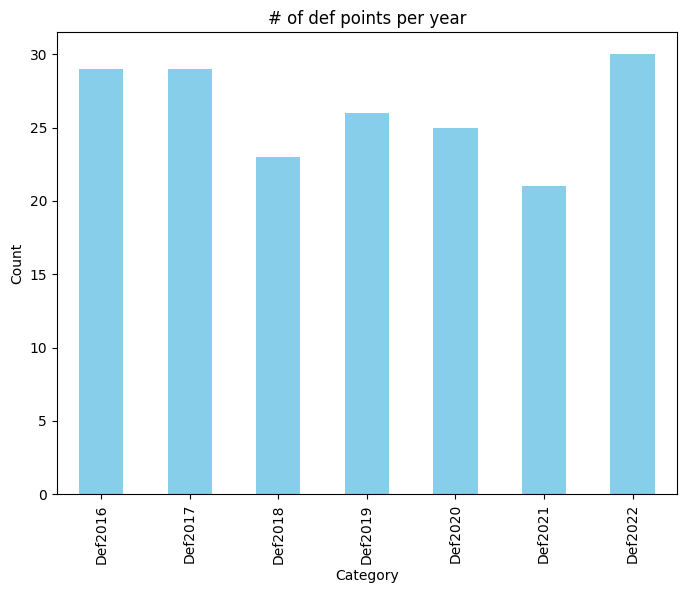

In [47]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

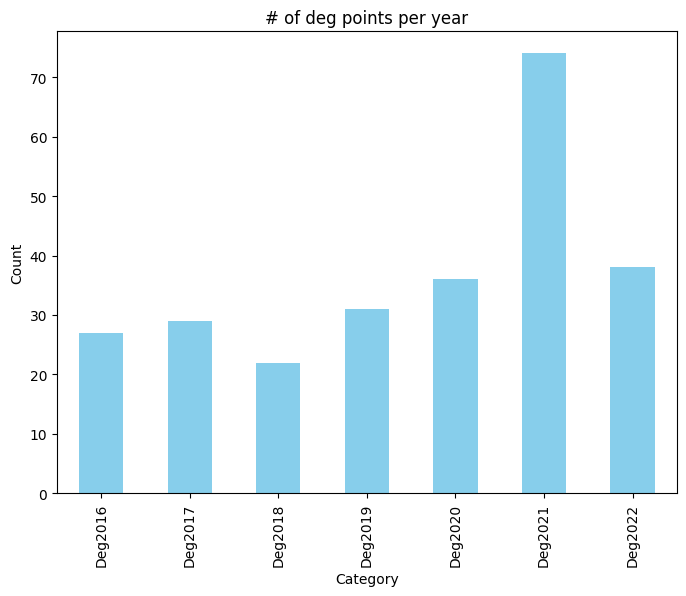

In [48]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [49]:
print(merged_ceo_nodup.dtypes)

plotid                      int64
point_id                    int64
sampleid                    int64
lon                       float64
lat                       float64
sample_geom                object
Ref_FNF_2015               object
Ref_Regeneration           object
Ref_Change_1522            object
Ref_Change_Type_1522       object
ArtFor                     object
ArtMine                    object
InfraR                     object
Urb                        object
IndFor                     object
Other                      object
Other_Desc                 object
IndMine                    object
IndAg                      object
ArtAg                      object
Ref_Year_1522             float64
Ref_NFtype_2015            object
Ref_Ftype_2015             object
collection                 object
interpreted                 int64
Ref_LCover_2015            object
Ref_Change_Year_1522       object
Ref_Change_LCover_1522     object
Def2016                     int64
Def2017       

### 4. export ceo data to one csv file

In [50]:
merged_ceo_nodup.to_csv(ceo_data_out,index_label='ID')